In [5]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import matplotlib.pyplot as plt
!ls ./data/fits

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
ls: cannot access './data/fits': No such file or directory


In [7]:
df = pd.read_csv('../data/fits/testrun/lightcone0/full_sky_bootstrap_LX-T.csv')

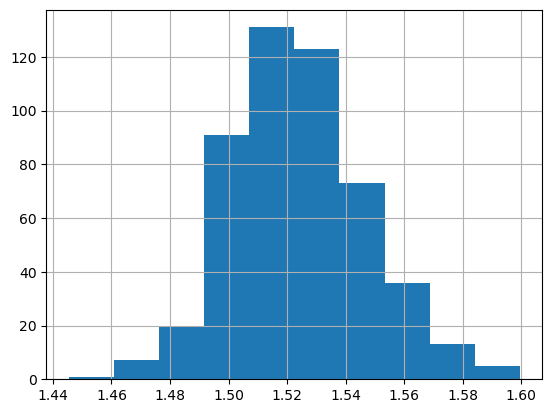

In [8]:
df['A'].hist()
plt.show()

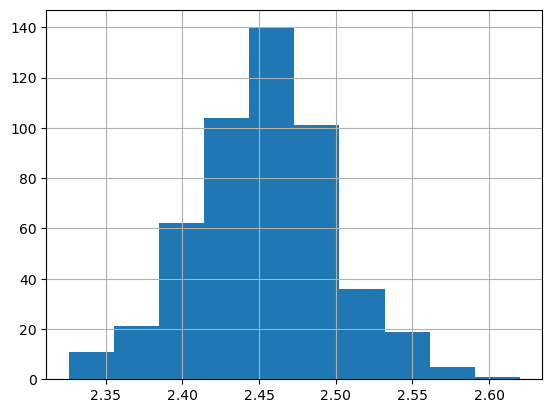

In [9]:
df['B'].hist()
plt.show()

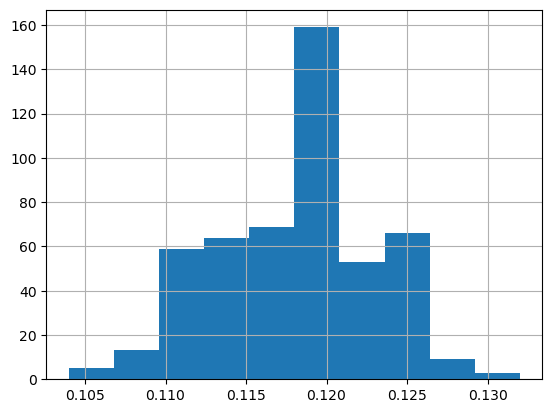

In [10]:
df['TotalScatter'].hist()
plt.show()

In [15]:
import os
import numpy as np
import pandas as pd
for f in os.listdir('../data/fits/testrun/lightcone0'):
    if 'full_sky_bootstrap' in f:
        df = pd.read_csv('../data/fits/testrun/lightcone0/' + f)
        Amax = df['A'].max()
        Bmax = df['B'].max()
        TotalScatterMax = df['TotalScatter'].max()
        Amin = df['A'].min()
        Bmin = df['B'].min()
        TotalScatterMin = df['TotalScatter'].min()
        Amean = df['A'].mean()
        Bmean = df['B'].mean()
        TotalScatterMean = df['TotalScatter'].mean()

        # get the range as 3 times the max deviations from the mean
        Adev = np.max([Amax - Amean, Amean - Amin])
        Bdev = np.max([Bmax - Bmean, Bmean - Bmin])
        TotalScatterDev = np.max([TotalScatterMax - TotalScatterMean, TotalScatterMean - TotalScatterMin])

        RangeAmin = Amean - 3*Adev
        RangeAmax = Amean + 3*Adev
        RangeBmin = Bmean - 3*Bdev
        RangeBmax = Bmean + 3*Bdev
        RangeTotalScatterMin = TotalScatterMean - 3*TotalScatterDev
        RangeTotalScatterMax = TotalScatterMean + 3*TotalScatterDev

        print(f, f"A: {RangeAmin:.2f} - {RangeAmax:.2f},",
            f"B: {RangeBmin:.2f} - {RangeBmax:.2f},", 
            f"TotalScatter: {RangeTotalScatterMin:.2f} - {RangeTotalScatterMax:.2f}")



full_sky_bootstrap_LX-YSZ.csv A: 2.56 - 3.50, B: 0.70 - 1.03, TotalScatter: 0.08 - 0.20
full_sky_bootstrap_YSZ-M.csv A: 3.36 - 4.17, B: 1.18 - 1.54, TotalScatter: 0.06 - 0.14
full_sky_bootstrap_LX-M.csv A: 1.10 - 1.36, B: 1.14 - 1.36, TotalScatter: 0.04 - 0.12
full_sky_bootstrap_YSZ-T.csv A: 0.90 - 1.23, B: 2.40 - 3.06, TotalScatter: 0.06 - 0.16
full_sky_bootstrap_LX-T.csv A: 1.29 - 1.76, B: 1.96 - 2.95, TotalScatter: 0.08 - 0.16
full_sky_bootstrap_M-T.csv A: 0.99 - 1.17, B: 1.73 - 2.25, TotalScatter: 0.04 - 0.10


In [ ]:
FIT_RANGE = {
    'YSZ-T': {
        'logA_min': np.log10(0.83), 'logA_max': np.log10(1.33),
        'B_min'   : 2.23,           'B_max'   : 3.28,
        'scat_min': -0.01,          'scat_max': 0.22,
    },
    'M-T': {
        'logA_min': np.log10(0.93), 'logA_max': np.log10(1.21),
        'B_min'   : 1.55,           'B_max'   : 2.45,
        'scat_min': 0.02,           'scat_max': 0.11,
    },
    'LX-T': {
        'logA_min': np.log10(1.19), 'logA_max': np.log10(1.84),
        'B_min'   : 1.69,           'B_max'   : 3.31,
        'scat_min': 0.04,           'scat_max': 0.19,
    },
    'LX-YSZ': {
        'logA_min': np.log10(2.27), 'logA_max': np.log10(3.68),
        'B_min'   : 0.70,           'B_max'   : 1.06,
        'scat_min': 0.03,           'scat_max': 0.27,
    },
    'YSZ-M': {
        'logA_min': np.log10(3.11), 'logA_max': np.log10(4.56),
        'B_min'   : 1.09,           'B_max'   : 1.63,
        'scat_min': 0.03,           'scat_max': 0.16,
    },
    'LX-M': {
        'logA_min': np.log10(0.99), 'logA_max': np.log10(1.46),
        'B_min'   : 1.09,           'B_max'   : 1.42,
        'scat_min': 0.02,           'scat_max': 0.14,
    },
}


In [ ]:
# This was the initial range before optimized pivot points
FIT_RANGE = {
    'LX-T': {
        'logA_min': np.log10(1.53), 'logA_max': np.log10(1.91),
        'B_min'   : 2.20,           'B_max'   : 2.79,
        'scat_min': 0.09,           'scat_max': 1,
    },
    'YSZ-T': {
        'logA_min': np.log10(1.75), 'logA_max': np.log10(2.47),
        'B_min'   : 2.47,           'B_max'   : 3.04,
        'scat_min': 0.06,           'scat_max': 1,
    },
    'M-T': {
        'logA_min': np.log10(1.01), 'logA_max': np.log10(1.21),
        'B_min'   : 1.82,           'B_max'   : 2.18,
        'scat_min': 0.05,           'scat_max': 1,
    },
    'LX-YSZ': {
        'logA_min': np.log10(1.98), 'logA_max': np.log10(2.71),
        'B_min'   : 0.78,           'B_max'   : 0.98,
        'scat_min': 0.10,           'scat_max': 1,
    },
    'LX-M': {
        'logA_min': np.log10(0.66), 'logA_max': np.log10(0.82),
        'B_min'   : 1.16,           'B_max'   : 1.34,
        'scat_min': 0.04,           'scat_max': 1,
    },
    'YSZ-M': {
        'logA_min': np.log10(0.67), 'logA_max': np.log10(0.88),
        'B_min'   : 1.24,           'B_max'   : 1.47,
        'scat_min': 0.06,           'scat_max': 1,
    },
}